In [59]:
%reload_ext autoreload
%autoreload 2

import src.models.HTK.htktools as htkt
from src.data.size_distribution import cm3_to_dndlogdp
from src.data.size_distribution import read_inv_file

import src.data.size_distribution as asd
import pandas as pd
import os
import matplotlib.pyplot as plt

SYNTHETIC_DATA_PATH = '/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/raw/'
DMPS_DATA_PATH = '/home/gfogwil/Documentos/Facultad/Tesis/data/DMPS/inv/'

### Leo los datos

In [6]:
synth_file = '2-20170204.h5'
synth_data = pd.read_hdf(os.path.join('../data/raw/simulation/', synth_file), key='obs/particle')
synth_data.columns = [float(x) for x in synth_data.columns]
synth_data = pd.DataFrame(index=synth_data.index, data=cm3_to_dndlogdp(synth_data/1e6), columns = synth_data.columns)

real_file = 'DM20170204.cle'
real_data = read_inv_file(real_file)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


### Grafico los datos sinteticos y los reale

In [24]:
real_data["2017-02-04 18"].columns

Float64Index([9.9998801e-09, 1.2003062e-08,  1.440753e-08, 1.7293495e-08,
              2.0757644e-08, 2.4915789e-08,  2.990661e-08, 3.5897634e-08,
              4.3088391e-08, 5.1719652e-08, 6.2079987e-08, 7.4515867e-08,
               8.944182e-08, 1.0735889e-07, 1.2886537e-07, 1.5467865e-07,
               1.856639e-07, 2.2285363e-07, 2.6749493e-07, 3.2107917e-07,
              3.8539625e-07, 4.6259726e-07,  5.552625e-07, 6.6649067e-07,
              8.0000007e-07],
             dtype='float64')

In [74]:
from scipy.optimize import curve_fit

def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2 / 2 / sigma ** 2)


def lognorm(x, mu, sigma, A):
    return (A/np.sqrt(2*np.pi)/np.log(sigma))*np.exp(-np.log(x/mu)**2/2/np.log(sigma)**2)


def bilognorm(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return lognorm(x, mu1, sigma1, A1)+lognorm(x, mu2, sigma2, A2)

def trilognorm(x, mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3):
    return lognorm(x, mu1, sigma1, A1)+lognorm(x, mu2, sigma2, A2)+lognorm(x, mu3, sigma3, A3)

def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return gauss(x, mu1, sigma1, A1)+gauss(x, mu2, sigma2, A2)


In [92]:
params

array([ 1.92524829e-08,  1.31738470e+00, -6.25399877e+05,  4.91992895e-08,
        2.12794859e+00,  1.17224261e+03,  1.92480742e-08,  1.31789271e+00,
        6.27156411e+05])

In [94]:
params[3:6]

array([4.91992895e-08, 2.12794859e+00, 1.17224261e+03])

In [110]:
dmps_data.mean(axis=0)

9.999880e-09      35.725140
1.200306e-08    2142.339323
1.440753e-08    1942.898585
1.729350e-08    1789.226018
2.075764e-08    1615.733559
2.491579e-08    1419.238474
2.990661e-08    1314.273228
3.589763e-08    1178.774357
4.308839e-08     904.372911
5.171965e-08     620.392513
6.207999e-08     490.116690
7.451587e-08     426.580183
8.944182e-08     385.029777
1.073589e-07     381.896211
1.288654e-07     352.332966
1.546787e-07     262.644441
1.856639e-07     174.355999
2.228536e-07     105.272973
2.674949e-07      63.832238
3.210792e-07      32.320224
3.853962e-07      16.148912
4.625973e-07       5.748021
5.552625e-07       1.920448
6.664907e-07       0.337884
8.000001e-07       0.118777
dtype: float64

/home/gfogwil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
/home/gfogwil/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


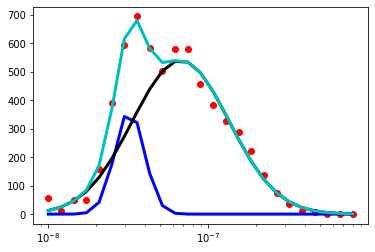

In [182]:
    dmps_data = real_data["2017-02-04 15"]

    rads = [1.0000111e-08, 1.2003355e-08, 1.4407894e-08, 1.729391e-08, 2.0757897e-08, 2.4916266e-08, 2.9907466e-08,
             3.5898359e-08, 4.3089797e-08, 5.172031e-08, 6.2080165e-08, 7.4515032e-08, 8.9441755e-08, 1.0735904e-07,
             1.2886439e-07, 1.5467883e-07, 1.8566246e-07, 2.228529e-07, 2.6749686e-07, 3.2108028e-07, 3.8539677e-07,
             4.6259638e-07, 5.5526079e-07, 6.664882e-07, 7.9999642e-07]
    x = np.linspace(0, 24, 25)


    expected = (35e-9, 1.5, 700, 70e-9, 1.5, 600, 130e-9, 5, 300)

    y = dmps_data.mean(axis=0)
    params, cov = curve_fit(trilognorm, rads, y.values, expected)
    sigma = np.sqrt(np.diag(cov))
    params_str = np.array2string(params, separator=',', precision=2, ).replace('[', '').replace(']', '')
    # pd.DataFrame(data={'params': params, 'sigma': sigma}, index=bimodal.__code__.co_varnames[1:])

    params
    plt.plot(rads, y, 'ro')
#     plt.plot(rads, trilognorm(rads, *params), color='black', lw=3, label='model')
    plt.plot(rads, lognorm(rads, *params[0:3]), color='b', lw=3, label='model')
    plt.plot(rads, lognorm(rads, *params[3:6]), color='k', lw=3, label='model')
    plt.plot(rads, bilognorm(rads, *params[0:6]), color='c', lw=3, label='model')
    plt.xscale('log')
    plt.show()

/home/gfogwil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


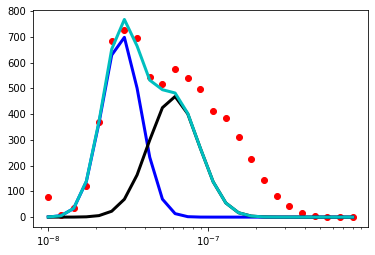

In [183]:
    dmps_data = real_data["2017-02-04 09"]

    rads = [1.0000111e-08, 1.2003355e-08, 1.4407894e-08, 1.729391e-08, 2.0757897e-08, 2.4916266e-08, 2.9907466e-08,
             3.5898359e-08, 4.3089797e-08, 5.172031e-08, 6.2080165e-08, 7.4515032e-08, 8.9441755e-08, 1.0735904e-07,
             1.2886439e-07, 1.5467883e-07, 1.8566246e-07, 2.228529e-07, 2.6749686e-07, 3.2108028e-07, 3.8539677e-07,
             4.6259638e-07, 5.5526079e-07, 6.664882e-07, 7.9999642e-07]
    x = np.linspace(0, 24, 25)


    expected = (35e-9, 1.5, 700, 70e-9, 1.5, 600, 130e-9, 5, 300)

    y = dmps_data.mean(axis=0)
    params, cov = curve_fit(trilognorm, rads, y.values, expected)
    sigma = np.sqrt(np.diag(cov))
    params_str = np.array2string(params, separator=',', precision=2, ).replace('[', '').replace(']', '')
    # pd.DataFrame(data={'params': params, 'sigma': sigma}, index=bimodal.__code__.co_varnames[1:])

    params
    plt.plot(rads, y, 'ro')
#     plt.plot(rads, trilognorm(rads, *params), color='black', lw=3, label='model')
    plt.plot(rads, lognorm(rads, *params[0:3]), color='b', lw=3, label='model')
    plt.plot(rads, lognorm(rads, *params[3:6]), color='k', lw=3, label='model')
    plt.plot(rads, bilognorm(rads, *params[0:6]), color='c', lw=3, label='model')
    plt.xscale('log')
    plt.show()

In [135]:
params

array([2.41511068e-08, 1.83475700e+00, 2.35783898e+03, 1.30868866e-08,
       1.04587943e+00, 9.66894587e+02, 1.14324713e-08, 9.95275045e-01,
       2.58833558e+02])

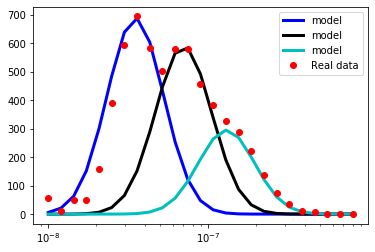

In [181]:
# plt.plot(synth_data.median(axis=0).values, label='Synth data')
ass_t1 = real_data["2017-02-04 15"].mean().values
ass_t2 = real_data["2017-02-04 18"].mean().values
ass_t3 = real_data["2017-02-04 21"].mean().values
ass_t4 = real_data["2017-02-04 23"].mean().values

plt.plot(real_data.columns, lognorm(real_data.columns, 35e-9, 1.5, 700), color='b', lw=3, label='model')
plt.plot(real_data.columns, lognorm(real_data.columns, 70e-9, 1.5, 600), color='k', lw=3, label='model')
plt.plot(real_data.columns, lognorm(real_data.columns, 130e-9, 1.5, 300), color='c', lw=3, label='model')

plt.plot(real_data.columns, ass_t1, 'ro', label='Real data')
# plt.plot(real_data.columns, ass_t2, label='Real data')
# plt.plot(real_data.columns, ass_t3, label='Real data')
# plt.plot(real_data.columns, ass_t4, label='Real data')
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.show()